# Continuoous pavement - controlled cracking

## Task: Identify relevant material parameter profiles timing for unstable crack growth

Steps to accomplish

- The temperature time evolution needs to be specified in individual blocks
- How to connect to the server via scp? 

In [4]:
%matplotlib widget
from atena_inp_gen import inject_time_functions
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from traits.api import HasTraits, Directory, Str
from pathlib import Path
import shutil

In [5]:
Path.home()

PosixPath('/home/rch')

In [21]:
import numpy as np

time_values = np.array([
    0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28
]) * 24

E_values = np.array([
    0, 6826, 11143, 13845, 15758, 17213, 18373, 19328, 20133, 20826, 21431, 21965, 22442, 22872, 23261, 23616, 23943, 24244, 24522, 24782, 25024, 25250, 25463, 25664, 25853, 26032, 26202, 26363, 26516, 26663, 26802, 26936, 27063, 27186, 27304, 27417, 27525, 27630, 27731, 27828, 27922, 28013, 28101, 28186, 28268, 28348, 28425, 28500, 28573, 28644, 28713, 28780, 28845, 28909, 28971, 29031, 29090, 29147, 29203, 29258, 29311, 29363, 29414, 29464, 29513, 29561, 29607, 29653, 29698, 29742, 29785, 30172, 30496, 30774, 31014, 31226, 31413, 31581, 31733, 31871, 31997, 32113, 32220, 32319, 32412, 32498, 32579, 32654, 32726, 32793, 32857, 32917
])

f_cc_values = np.array([
    0, 1.53, 4.08, 6.3, 8.16, 9.73, 11.09, 12.27, 13.32, 14.25, 15.09, 15.85, 16.55, 17.19, 17.78, 18.32, 18.83, 19.31, 19.76, 20.18, 20.57, 20.95, 21.3, 21.64, 21.96, 22.27, 22.56, 22.83, 23.1, 23.36, 23.6, 23.84, 24.06, 24.28, 24.49, 24.7, 24.89, 25.08, 25.27, 25.44, 25.62, 25.78, 25.94, 26.1, 26.25, 26.4, 26.55, 26.69, 26.82, 26.96, 27.09, 27.21, 27.34, 27.46, 27.58, 27.69, 27.8, 27.91, 28.02, 28.12, 28.23, 28.33, 28.43, 28.52, 28.62, 28.71, 28.8, 28.89, 28.98, 29.06, 29.15, 29.91, 30.56, 31.11, 31.6, 32.04, 32.42, 32.77, 33.09, 33.37, 33.64, 33.88, 34.11, 34.32, 34.52, 34.7, 34.87, 35.03, 35.19, 35.33, 35.47, 35.6
])

f_ct_values = np.array([
    0, 0.71, 1.05, 1.25, 1.39, 1.49, 1.57, 1.63, 1.69, 1.73, 1.77, 1.81, 1.84, 1.87, 1.89, 1.92, 1.94, 1.96, 1.98, 1.99,
    2.01, 2.02, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09, 2.1, 2.11, 2.12, 2.13, 2.14, 2.15, 2.15, 2.16, 2.17, 2.17, 2.18, 2.19,
    2.19, 2.2, 2.2, 2.21, 2.21, 2.22, 2.22, 2.23, 2.23, 2.24, 2.24, 2.25, 2.25, 2.25, 2.26, 2.26, 2.26, 2.27, 2.27, 2.28,
    2.28, 2.28, 2.28, 2.29, 2.29, 2.29, 2.3, 2.3, 2.3, 2.31, 2.31, 2.33, 2.35, 2.37, 2.38, 2.4, 2.41, 2.42, 2.43, 2.44,
    2.44, 2.45, 2.46, 2.46, 2.47, 2.47, 2.48, 2.48, 2.49, 2.49, 2.5, 2.5
])

G_f_values = np.array([
    0, 3.944E-05, 5.838E-05, 6.945E-05, 7.703E-05, 8.267E-05, 8.709E-05, 9.070E-05, 9.371E-05, 9.628E-05, 9.851E-05, 1.005E-04, 1.022E-04, 1.038E-04, 1.052E-04, 1.065E-04, 1.076E-04, 1.087E-04, 1.097E-04, 1.107E-04, 1.115E-04, 1.123E-04, 1.131E-04, 1.138E-04, 1.145E-04, 1.151E-04, 1.157E-04, 1.163E-04, 1.168E-04, 1.173E-04, 1.178E-04, 1.183E-04, 1.187E-04, 1.192E-04, 1.196E-04, 1.200E-04, 1.203E-04, 1.207E-04, 1.211E-04, 1.214E-04, 1.217E-04, 1.220E-04, 1.224E-04, 1.227E-04, 1.229E-04, 1.232E-04, 1.235E-04, 1.237E-04, 1.240E-04, 1.242E-04, 1.245E-04, 1.247E-04, 1.249E-04, 1.252E-04, 1.254E-04, 1.256E-04, 1.258E-04, 1.260E-04, 1.262E-04, 1.264E-04, 1.266E-04, 1.267E-04, 1.269E-04, 1.271E-04, 1.272E-04, 1.274E-04, 1.276E-04, 1.277E-04, 1.279E-04, 1.280E-04, 1.282E-04, 1.295E-04, 1.306E-04, 1.316E-04, 1.324E-04, 1.331E-04, 1.338E-04, 1.343E-04, 1.349E-04, 1.353E-04, 1.358E-04, 1.361E-04, 1.365E-04, 1.368E-04, 1.372E-04, 1.374E-04, 1.377E-04, 1.380E-04, 1.382E-04, 1.384E-04, 1.387E-04, 1.389E-04
])

f_c0_values = np.array([
    0, -1.45, -2.21, -2.63, -2.92, -3.13, -3.3, -3.42, -3.55, -3.63, -3.72, -3.8, -3.86, -3.93, -3.97, -4.03, -4.07, -4.12, -4.16, -4.18, -4.22, -4.24, -4.28, -4.31, -4.33, -4.35, -4.37, -4.39, -4.41, -4.43, -4.45, -4.47, -4.49, -4.52, -4.52, -4.54, -4.56, -4.56, -4.58, -4.6, -4.6, -4.62, -4.62, -4.64, -4.64, -4.66, -4.66, -4.68, -4.68, -4.7, -4.7, -4.73, -4.73, -4.73, -4.75, -4.75, -4.75, -4.77, -4.77, -4.79, -4.79, -4.79, -4.79, -4.81, -4.81, -4.81, -4.83, -4.83, -4.83, -4.85, -4.85, -4.89, -4.94, -4.98, -5, -5.04, -5.06, -5.08, -5.1, -5.12, -5.12, -5.15, -5.17, -5.17, -5.19, -5.19, -5.21, -5.21, -5.23, -5.23, -5.25, -5.25
])

max_time = 7 * 24 # days
max_idx = np.argmax(time_values > max_time)
max_idx


71

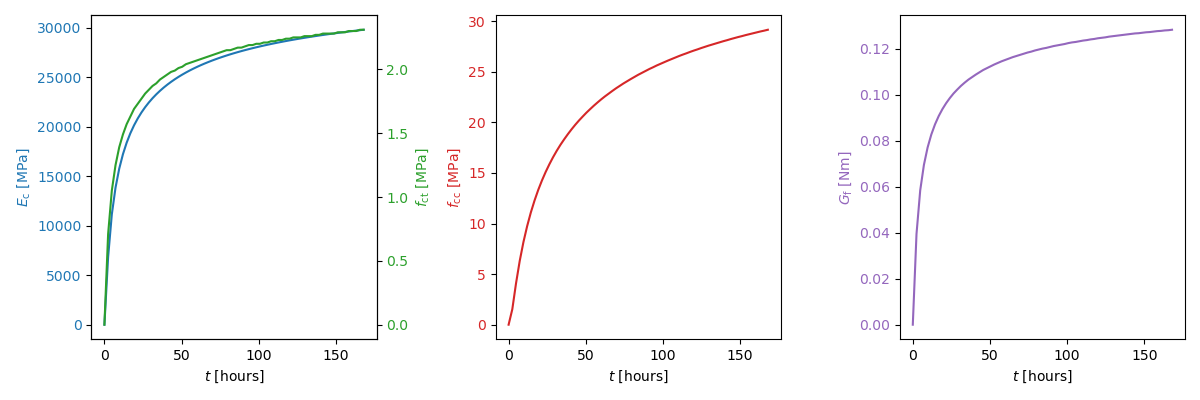

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.canvas.header_visible = False

color = 'tab:blue'
ax1.set_xlabel(r'$t$ [hours]')
ax1.set_ylabel(r'$E_\mathrm{c}$ [MPa]', color=color)
ax1.plot(time_values[:max_idx], E_values[:max_idx], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax12 = ax1.twinx()
color = 'tab:green'
ax12.set_ylabel(r'$f_\mathrm{ct}$ [MPa]', color=color)
ax12.plot(time_values[:max_idx], f_ct_values[:max_idx], color=color)
ax12.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax2.set_xlabel(r'$t$ [hours]')
ax2.set_ylabel(r'$f_\mathrm{cc}$ [MPa]', color=color)
ax2.plot(time_values[:max_idx], f_cc_values[:max_idx], color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:purple'
ax3.set_xlabel(r'$t$ [hours]')
ax3.set_ylabel('$G_\mathrm{f}$ [Nm]', color=color)
ax3.plot(time_values[:max_idx], G_f_values[:max_idx] * 1000, color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

home_dir = Path.home() / 'remmina' / 'atena' / 'time_functions'
home_dir.mkdir(parents=True, exist_ok=True)
fig.savefig(home_dir / 'time_functions_7days.png')


In [16]:
time_function_substitutions = {
    10251: ([1.0, 2, 3, 72.0], [20000.0, 25000.0, 28000.0,30000.0]),
    10252: ([1.0, 2, 3, 72.0], [1.7, 2, 2.2, 2.3]),
    10253: ([1.0, 72.0], [-16.0, -29.0]),
    10254: ([1.0, 72.0], [9.85e-05, 1.28e-04]),
    10255: ([1.0, 72.0], [-4.0, -5.0]),
    20251: ([1.0, 2.0, 72.0], [20000.0, 0.0, 0.0]),
    20252: ([1.0, 2.0, 72.0], [1.7, 0.0, 0.0]),
    20253: ([1.0, 2.0, 72.0], [-16.0, 0.0, 0.0]),
    20254: ([1.0, 2.0, 72.0], [9.85e-05, 0.0, 0.0]),
    20255: ([1.0, 2.0, 72.0], [-4.0, 0.0, 0.0])
}

In [17]:
time_function_substitutions = {
    10251: (time_values, E_values),
    10252: (time_values, f_ct_values),
    10253: (time_values, f_cc_values),
    10254: (time_values, G_f_values),
    10255: (time_values, f_c0_values),
    20251: ([1.0, 2.0, 72.0], [20000.0, 0.0, 0.0]),
    20252: ([1.0, 2.0, 72.0], [1.7, 0.0, 0.0]),
    20253: ([1.0, 2.0, 72.0], [-16.0, 0.0, 0.0]),
    20254: ([1.0, 2.0, 72.0], [9.85e-05, 0.0, 0.0]),
    20255: ([1.0, 2.0, 72.0], [-4.0, 0.0, 0.0])
}

In [18]:
from traits.api import Property, cached_property
from traits.api import Dict, Tuple, Array, Int

class AtenaSimulationContext(HasTraits):
    top_level_dir = Directory()
    templates_dir = Path.cwd() / 'templates'
    study_name = Str()

    study_dir = Property
    @cached_property
    def _get_study_dir(self):
        return Path(self.top_level_dir) / self.study_name

    atena_calc_dir = Property
    @cached_property
    def _get_atena_calc_dir(self):
        path = self.study_dir / 'AtenaCalculationModified'
        path.mkdir(parents=True, exist_ok=True)
        return path

    inp_file = Property
    @cached_property
    def _get_inp_file(self):
        return self.study_dir / f'{self.study_name}.inp'
    
    time_functions = Dict(Int, Tuple(Array, Array))
    
    inp_modified_file = Property
    @cached_property
    def _get_inp_modified_file(self):
        return self.atena_calc_dir / f'{self.study_name}.inp'

    def create_study_directory(self):
        self.atena_calc_dir.mkdir(parents=True, exist_ok=True)
        return self.atena_calc_dir  
        
    def copy_scripts(self):
        study_dir = Path(self.top_level_dir) / self.study_name
        scripts = ['run_inp_in_AtenaConsole.bat', 'run_inp_in_AtenaStudio.bat', 'run_inp_in_AtenaWin.bat']
        for script in scripts:
            script_path = self.templates_dir / script
            with open(script_path, 'r') as file:
                content = file.read()
            content = content.replace('atena_study_basename', self.study_name)
            with open(study_dir / script, 'w') as file:
                file.write(content)

    def setup_simulation(self):
        atena_calc_dir = self.create_study_directory()
        self.copy_scripts()
        inject_time_functions(self.inp_file, self.inp_modified_file, self.time_functions)

# # Example usage
# stop_time = 7.0
# num_steps = 1000
# load_case_id = 510001

# input_section = generate_input_section(stop_time, num_steps, load_case_id)
# print(input_section)



In [19]:
# Example usage:
context = AtenaSimulationContext(
    top_level_dir=Path.home() / 'remmina', 
    study_name='atena_pavement',
    time_functions=time_function_substitutions
)
context.inp_file

PosixPath('/home/rch/remmina/atena_pavement/atena_pavement.inp')

In [20]:
atena_calc_dir = context.setup_simulation()
print(f'Simulation directory set up at: {atena_calc_dir}')

Injecting new data for FUNCTION ID 10251
Injecting new data for FUNCTION ID 10252
Injecting new data for FUNCTION ID 10253
Injecting new data for FUNCTION ID 10254
Injecting new data for FUNCTION ID 10255
Injecting new data for FUNCTION ID 20251
Injecting new data for FUNCTION ID 20252
Injecting new data for FUNCTION ID 20253
Injecting new data for FUNCTION ID 20254
Injecting new data for FUNCTION ID 20255
Simulation directory set up at: None


[1.0, 2, 3, 7.0] [20000.0, 25000.0, 28000.0, 30000.0]
[1.0, 2, 3, 7.0] [1.7, 2, 2.2, 2.3]
[1.0, 7.0] [-16.0, -29.0]
[1.0, 7.0] [9.85e-05, 0.000128]
[1.0, 7.0] [-4.0, -5.0]
[1.0, 2.0, 7.0] [20000.0, 0.0, 0.0]
[1.0, 2.0, 7.0] [1.7, 0.0, 0.0]
[1.0, 2.0, 7.0] [-16.0, 0.0, 0.0]
[1.0, 2.0, 7.0] [9.85e-05, 0.0, 0.0]
[1.0, 2.0, 7.0] [-4.0, 0.0, 0.0]


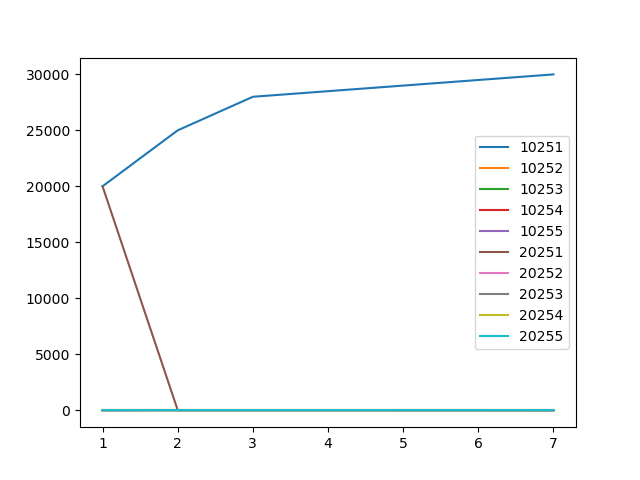

In [8]:
fig, ax = plt.subplots()
for key, (xvalues, yvalues) in time_functions.items():
    print(xvalues, yvalues)
    ax.plot(xvalues, yvalues, label=f'{key}')
ax.legend()